In [1]:
import osmnx as ox
import networkx as nx
import numpy as np

import helper_functions as hf
import importlib
importlib.reload(hf)

<module 'helper_functions' from '/home/lema/Documents/diplomska/dai/helper_functions.py'>

In [2]:
place = 'Kamppi, Helsinki, Finland'
graph_ox = ox.graph_from_place(place,network_type='drive')

# print(type(graph_ox))
# fig, ax = ox.plot_graph(graph_ox,edge_color='y')

graph = nx.convert_node_labels_to_integers(nx.DiGraph(graph_ox))
# graph.nodes()
# graph.edges(data=True)



hf.fill_maxspeed(graph)

graph.edges(data=True)
times = {e: graph.edges()[e]["length"]/graph.edges()[e]["maxspeed"] for e in graph.edges()}
capacities = {e: 1 + graph.edges()[e]["length"]*graph.edges()[e]["maxspeed"]/1000 for e in graph.edges()}
nx.set_edge_attributes(graph, times,"c")
nx.set_edge_attributes(graph, capacities,"cap")

living_street is set to 30
living_street is set to 30
residential is set to 30
residential is set to 30
living_street is set to 30
living_street is set to 30


array([[<AxesSubplot: title={'center': 'cap'}>]], dtype=object)

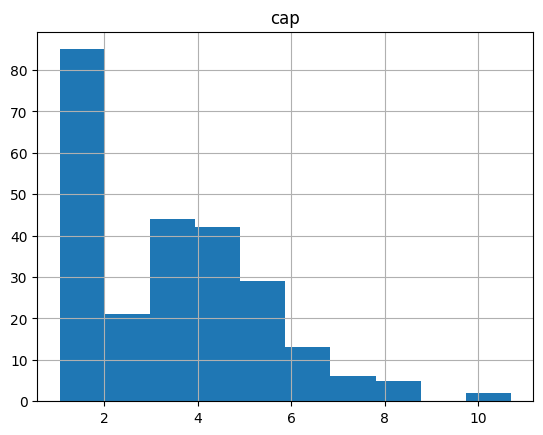

In [5]:
graph.edges(data=True)
df = nx.to_pandas_edgelist(graph, nodelist=graph.nodes())
df[["cap"]].hist(bins=10)

In [6]:
graph.nodes(data=True)
# df = nx.to_pandas_nodelist(graph, nodelist=graph.nodes())
# df[["cap"]].hist(bins=10)
# df

NodeDataView({0: {'y': 60.1647939, 'x': 24.9210566, 'street_count': 4}, 1: {'y': 60.1636645, 'x': 24.9210282, 'street_count': 4}, 2: {'y': 60.164631, 'x': 24.9212859, 'street_count': 3}, 3: {'y': 60.1643255, 'x': 24.9370233, 'street_count': 4}, 4: {'y': 60.1659479, 'x': 24.9416738, 'street_count': 4}, 5: {'y': 60.1651348, 'x': 24.939344, 'highway': 'traffic_signals', 'street_count': 4}, 6: {'y': 60.1653511, 'x': 24.9355842, 'street_count': 4}, 7: {'y': 60.1634458, 'x': 24.9345002, 'street_count': 4}, 8: {'y': 60.1711426, 'x': 24.9324437, 'street_count': 4}, 9: {'y': 60.1694182, 'x': 24.9273621, 'street_count': 3}, 10: {'y': 60.1707248, 'x': 24.9315761, 'street_count': 3}, 11: {'y': 60.1664916, 'x': 24.9306919, 'street_count': 4}, 12: {'y': 60.1669427, 'x': 24.9272265, 'highway': 'traffic_signals', 'street_count': 3}, 13: {'y': 60.1641708, 'x': 24.9266982, 'street_count': 4}, 14: {'y': 60.1657346, 'x': 24.9261818, 'street_count': 1}, 15: {'y': 60.1636339, 'x': 24.9274293, 'street_count'

In [3]:
# obj,constraints,vp = hf.init_from_graph(graph,[(0,3,1),(0,4,3),(0,5,2)])
obj,constraints,vp = hf.init_from_graph(graph,[(15,91,5)])

# hf.plot_multigraph(graph, with_labels=True, font_size=10)

[1. 0. 1. 6. 5. 5. 6. 5. 5. 5. 5. 5. 3. 6. 6. 6. 4. 4. 2. 3. 0. 0. 0. 4.
 4. 8. 2. 3. 2. 4. 3. 3. 2. 6. 5. 2. 0. 5. 3. 5. 3. 5. 6. 3. 0. 3. 3. 1.
 1. 8. 1. 0. 1. 1. 1. 3. 1. 3. 1. 1. 3. 2. 0. 1. 3. 3. 1. 2. 3. 1. 0. 4.
 3. 0. 3. 0. 0. 1. 5. 5. 3. 0. 0. 3. 0. 1. 1. 0. 1. 3. 1. 4. 4. 2. 2. 1.
 1. 3. 0. 8. 2. 1. 3. 3. 0. 0. 2. 0. 4. 0. 0. 0. 0. 1. 0. 6. 0. 1. 1. 0.
 0. 0. 1. 1. 3. 1. 1. 0. 1. 0. 1. 3. 1. 2. 3. 8. 1. 5. 3. 2. 2. 3. 2. 5.
 4. 4. 5. 4. 1. 3. 1. 2. 3. 0. 0. 0. 1. 2. 4. 4. 3. 3. 0. 8. 5. 2. 3. 3.
 3. 5. 3. 2. 8. 8. 3. 6. 4. 2. 4. 2. 6. 4. 0. 2. 1. 1. 3. 1. 4. 2. 1. 0.
 0. 3. 4. 6. 6. 3. 2. 3. 6. 2. 3. 3. 3. 3. 2. 0. 3. 5. 7. 2. 3. 5. 5. 3.
 4. 5. 2. 5. 3. 5. 3. 5. 5. 7. 5. 0. 3. 6. 0. 3. 1. 0. 2. 3. 0. 6. 0. 2.
 1. 0. 1. 0. 1. 3. 1.]
[ 2.  1.  2. 10.  5.  5.  6.  5.  5.  5.  5.  5.  4.  6.  6.  6.  4.  4.
  3.  4.  1.  1.  1.  4.  4.  8.  3.  4.  2.  4.  4.  3.  3.  6.  5.  2.
  1.  5.  3.  5.  4.  5.  6.  3.  1.  3.  4.  2.  1.  8.  1.  1.  1.  1.
  1.  3.  1.  4.  2.  2.  3.

In [10]:
# from networkx.drawing.nx_agraph import write_dot
# write_dot(graph,'multi.dot')

In [15]:
# nx.write_latex(graph,"latex_graph.txt")
# from network2tikz import plot
# plot(graph,'mypdf.pdf')

In [7]:
list(graph.edges())[179]

(92, 91)

[((0, 3225.0), 0)]


/home/lema/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:200: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)


39 7.275957614183426e-12
****[((True, 20), 1), ((True, 20), 2)]
39 7.275957614183426e-12
***[((True, 20), 2), ((False, 20), 3), ((False, 20), 4)]
39 7.275957614183426e-12
****[((False, 20), 3), ((False, 20), 4)]
39 7.275957614183426e-12
***[((False, 20), 4), ((False, 20), 5), ((False, 20), 6)]
51 3.0517578125e-05
****[((False, 20), 5), ((False, 20), 6)]
51 3.0517578125e-05
*[((False, 20), 6)]
51 3.0517578125e-05
VSE PREISKANO
0 / 0: neki z: 3225.0, zLD: 20 cap_ok = False (92, 91)(179),(0, 2, 3) 
	1 / 1: feasible FEASIBLE for I z: 28.0, zLD: 20 cap_ok = True (13, 92)(24),(0, 2, 3) 
		3 / 3: feasible FEASIBLE for I z: 28.0, zLD: 20 cap_ok = True (15, 91)(29),(0, 3, 4) 
			5 / 5: feasible FEASIBLE for I OPTIMAL for I z: 28.0, zLD: 28 cap_ok = True
			6 / 6: feasible FEASIBLE for I OPTIMAL for I z: 24.0, zLD: 24 cap_ok = True
		4 / 4: feasible COST too large(28.0) z: 36.0, zLD: 36 cap_ok = True
	2 / 2: feasible COST too large(28.0) z: 32.0, zLD: 32 cap_ok = True

6 / 6: feasible FEASIBLE f

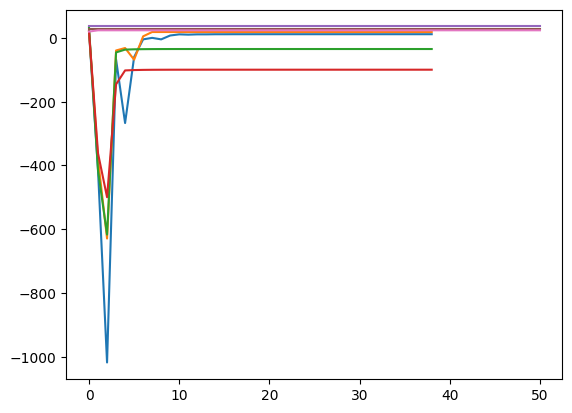

In [4]:
n_best = hf.run(obj,constraints,vp,graph,MAX_ITER=40,MAX_ITER_LR=50)
# TODO LB je prevelik, ker obstaja pot s ceno 24

In [42]:
# LB, UB, X_best = hf.run2(obj,constraints,vp,MAX_ITER=1000)
# print(LB,UB,X_best)

In [13]:
n_best.sol["z"]

28.0

In [11]:
hf.plot_solution_graph(graph,n_best.sol["X"],with_labels=True,font_size=7)

AttributeError: 'NoneType' object has no attribute 'sol'

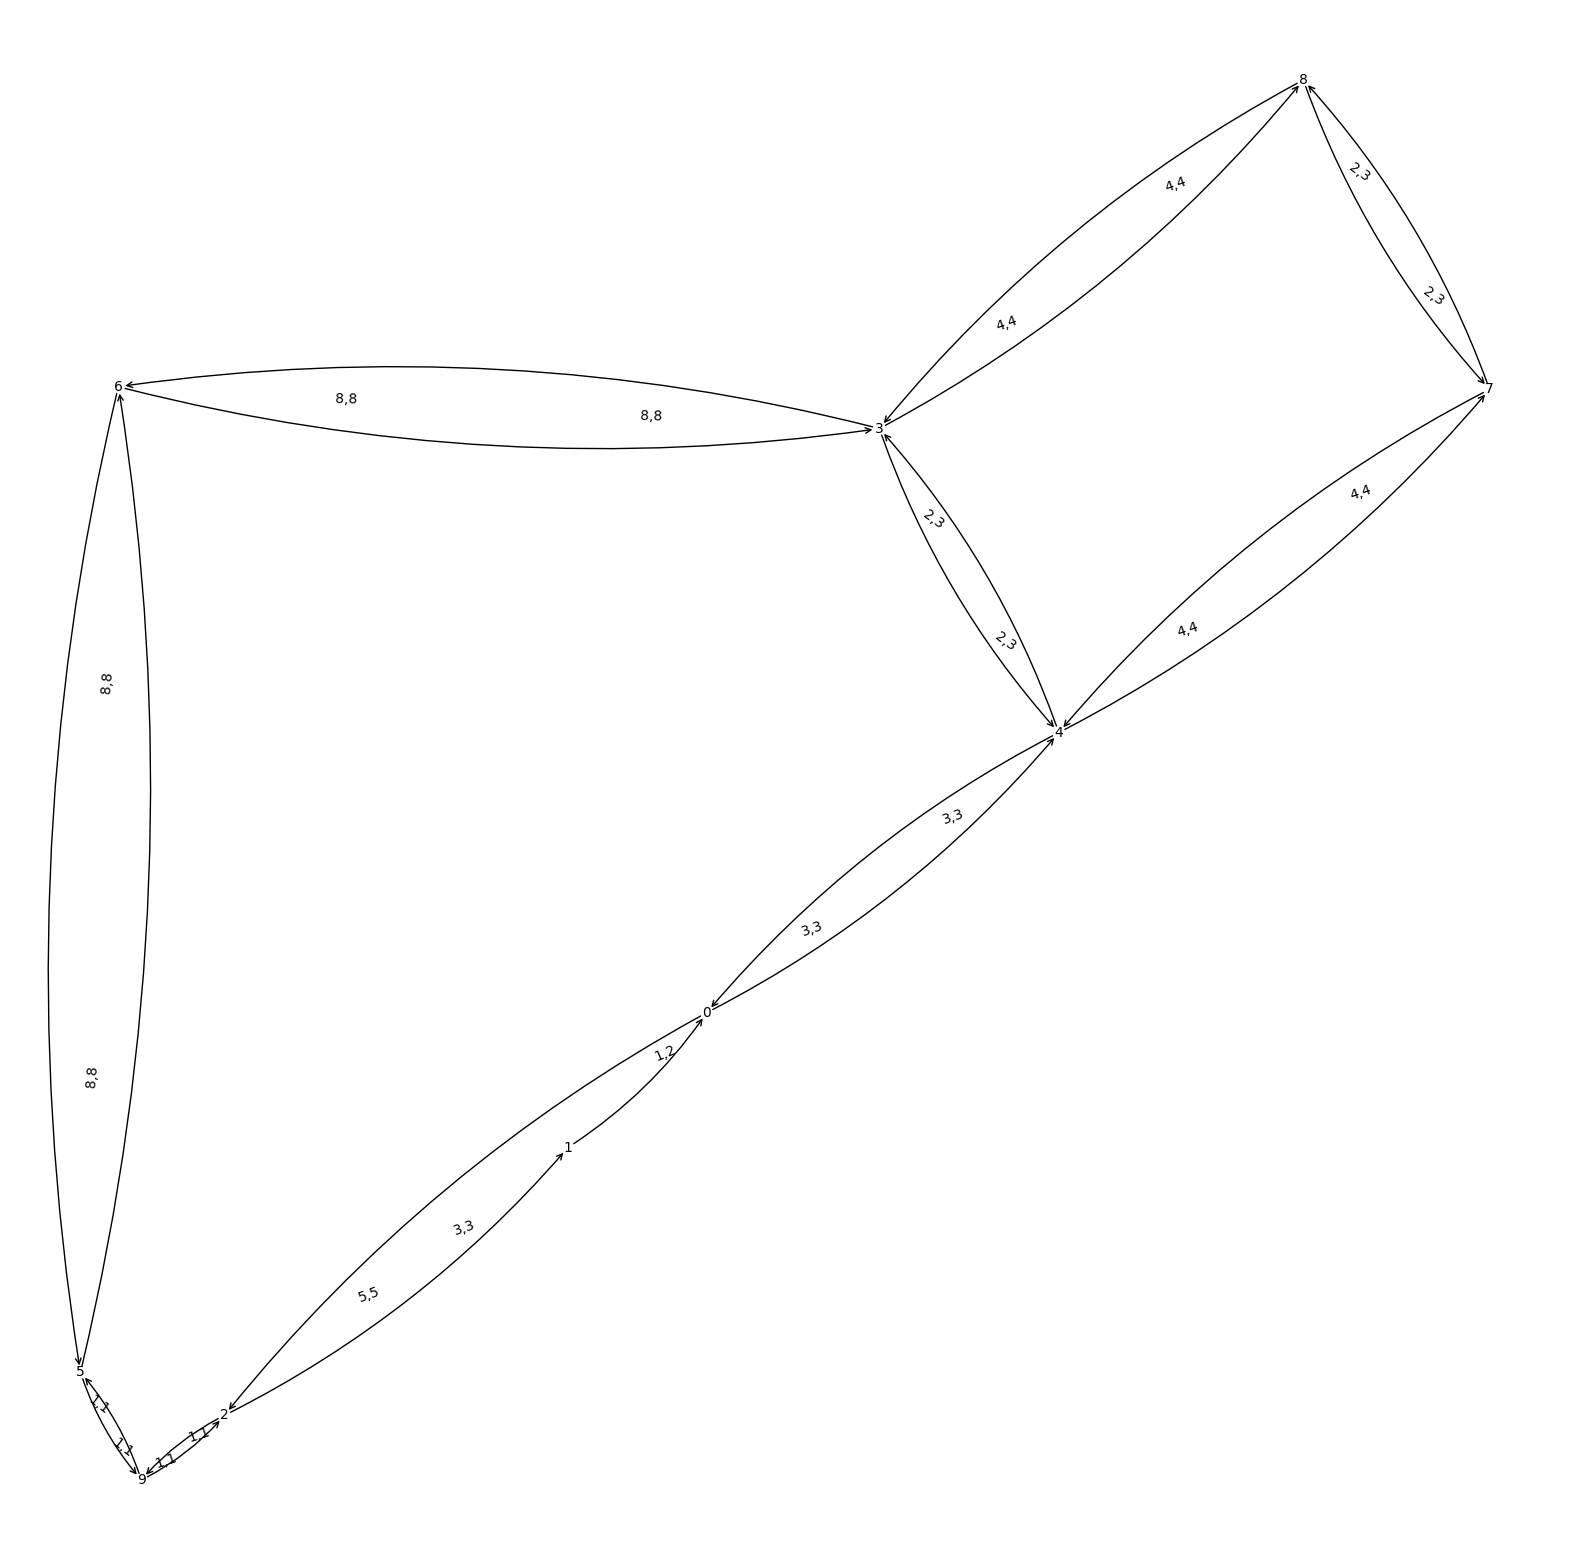

In [14]:

subgraph = nx.convert_node_labels_to_integers(graph.subgraph([92,91,15,13,39,27,72,94,22,90]))
hf.plot_multigraph(subgraph, with_labels=True, font_size=10)

[5. 3. 1. 1. 3. 4. 8. 2. 4. 3. 2. 1. 8. 8. 8. 4. 2. 2. 4. 1. 1.]
[5. 3. 2. 1. 3. 4. 8. 3. 4. 3. 3. 1. 8. 8. 8. 4. 3. 3. 4. 1. 1.]
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 5.]
 [ 0.]
 [ 0.]
 [-5.]
 [ 0.]
 [ 0.]]
[(0, 24)]
40 7.275957614183426e-12
****[(True, 24.0), (True, 24.0)]
51 3.0517578125e-05
**[(True, 24.0)]
51 3.0517578125e-05
VSE PREISKANO
0 / 0: neki z: 375.0, zLD: 24.0 cap_ok = False (4, 108),(0, 3, 4) 
	1 / 1: feasible COST too large(24) z: 28.0, zLD: 28.0 cap_ok = True
	2 / 2: feasible FEASIBLE for I OPTIMAL for I z: 24.0, zLD: 24.0 cap_ok = True



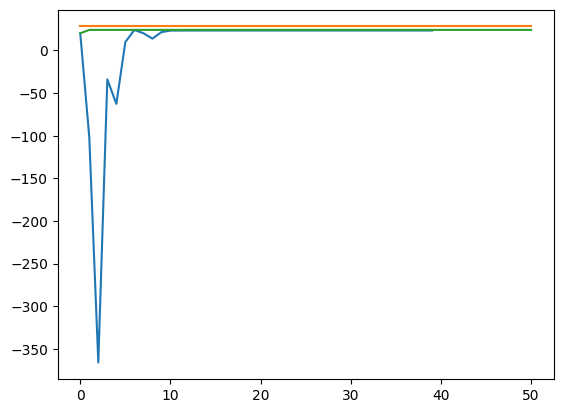

In [18]:
# obj1,constraints1,vp1 = hf.init_from_graph(subgraph,[(15,91,5)])
obj1,constraints1,vp1 = hf.init_from_graph(subgraph,[(4,7,5)])
n_best = hf.run(obj1,constraints1,vp1,graph,MAX_ITER=40,MAX_ITER_LR=50)

In [8]:
# df = nx.to_pandas_edgelist(subgraph, nodelist=graph.nodes())
# df

[1. 0. 1. 6. 5. 5. 6. 5. 5. 5. 5. 5. 3. 6. 6. 6. 4. 4. 2. 3. 0. 0. 0. 4.
 4. 8. 2. 3. 2. 4. 3. 3. 2. 6. 5. 2. 0. 5. 3. 5. 3. 5. 6. 3. 0. 3. 3. 1.
 1. 8. 1. 0. 1. 1. 1. 3. 1. 3. 1. 1. 3. 2. 0. 1. 3. 3. 1. 2. 3. 1. 0. 4.
 3. 0. 3. 0. 0. 1. 5. 5. 3. 0. 0. 3. 0. 1. 1. 0. 1. 3. 1. 4. 4. 2. 2. 1.
 1. 3. 0. 8. 2. 1. 3. 3. 0. 0. 2. 0. 4. 0. 0. 0. 0. 1. 0. 6. 0. 1. 1. 0.
 0. 0. 1. 1. 3. 1. 1. 0. 1. 0. 1. 3. 1. 2. 3. 8. 1. 5. 3. 2. 2. 3. 2. 5.
 4. 4. 5. 4. 1. 3. 1. 2. 3. 0. 0. 0. 1. 2. 4. 4. 3. 3. 0. 8. 5. 2. 3. 3.
 3. 5. 3. 2. 8. 8. 3. 6. 4. 2. 4. 2. 6. 4. 0. 2. 1. 1. 3. 1. 4. 2. 1. 0.
 0. 3. 4. 6. 6. 3. 2. 3. 6. 2. 3. 3. 3. 3. 2. 0. 3. 5. 7. 2. 3. 5. 5. 3.
 4. 5. 2. 5. 3. 5. 3. 5. 5. 7. 5. 0. 3. 6. 0. 3. 1. 0. 2. 3. 0. 6. 0. 2.
 1. 0. 1. 0. 1. 3. 1.]
[ 2.  1.  2. 10.  5.  5.  6.  5.  5.  5.  5.  5.  4.  6.  6.  6.  4.  4.
  3.  4.  1.  1.  1.  4.  4.  8.  3.  4.  2.  4.  4.  3.  3.  6.  5.  2.
  1.  5.  3.  5.  4.  5.  6.  3.  1.  3.  4.  2.  1.  8.  1.  1.  1.  1.
  1.  3.  1.  4.  2.  2.  3.

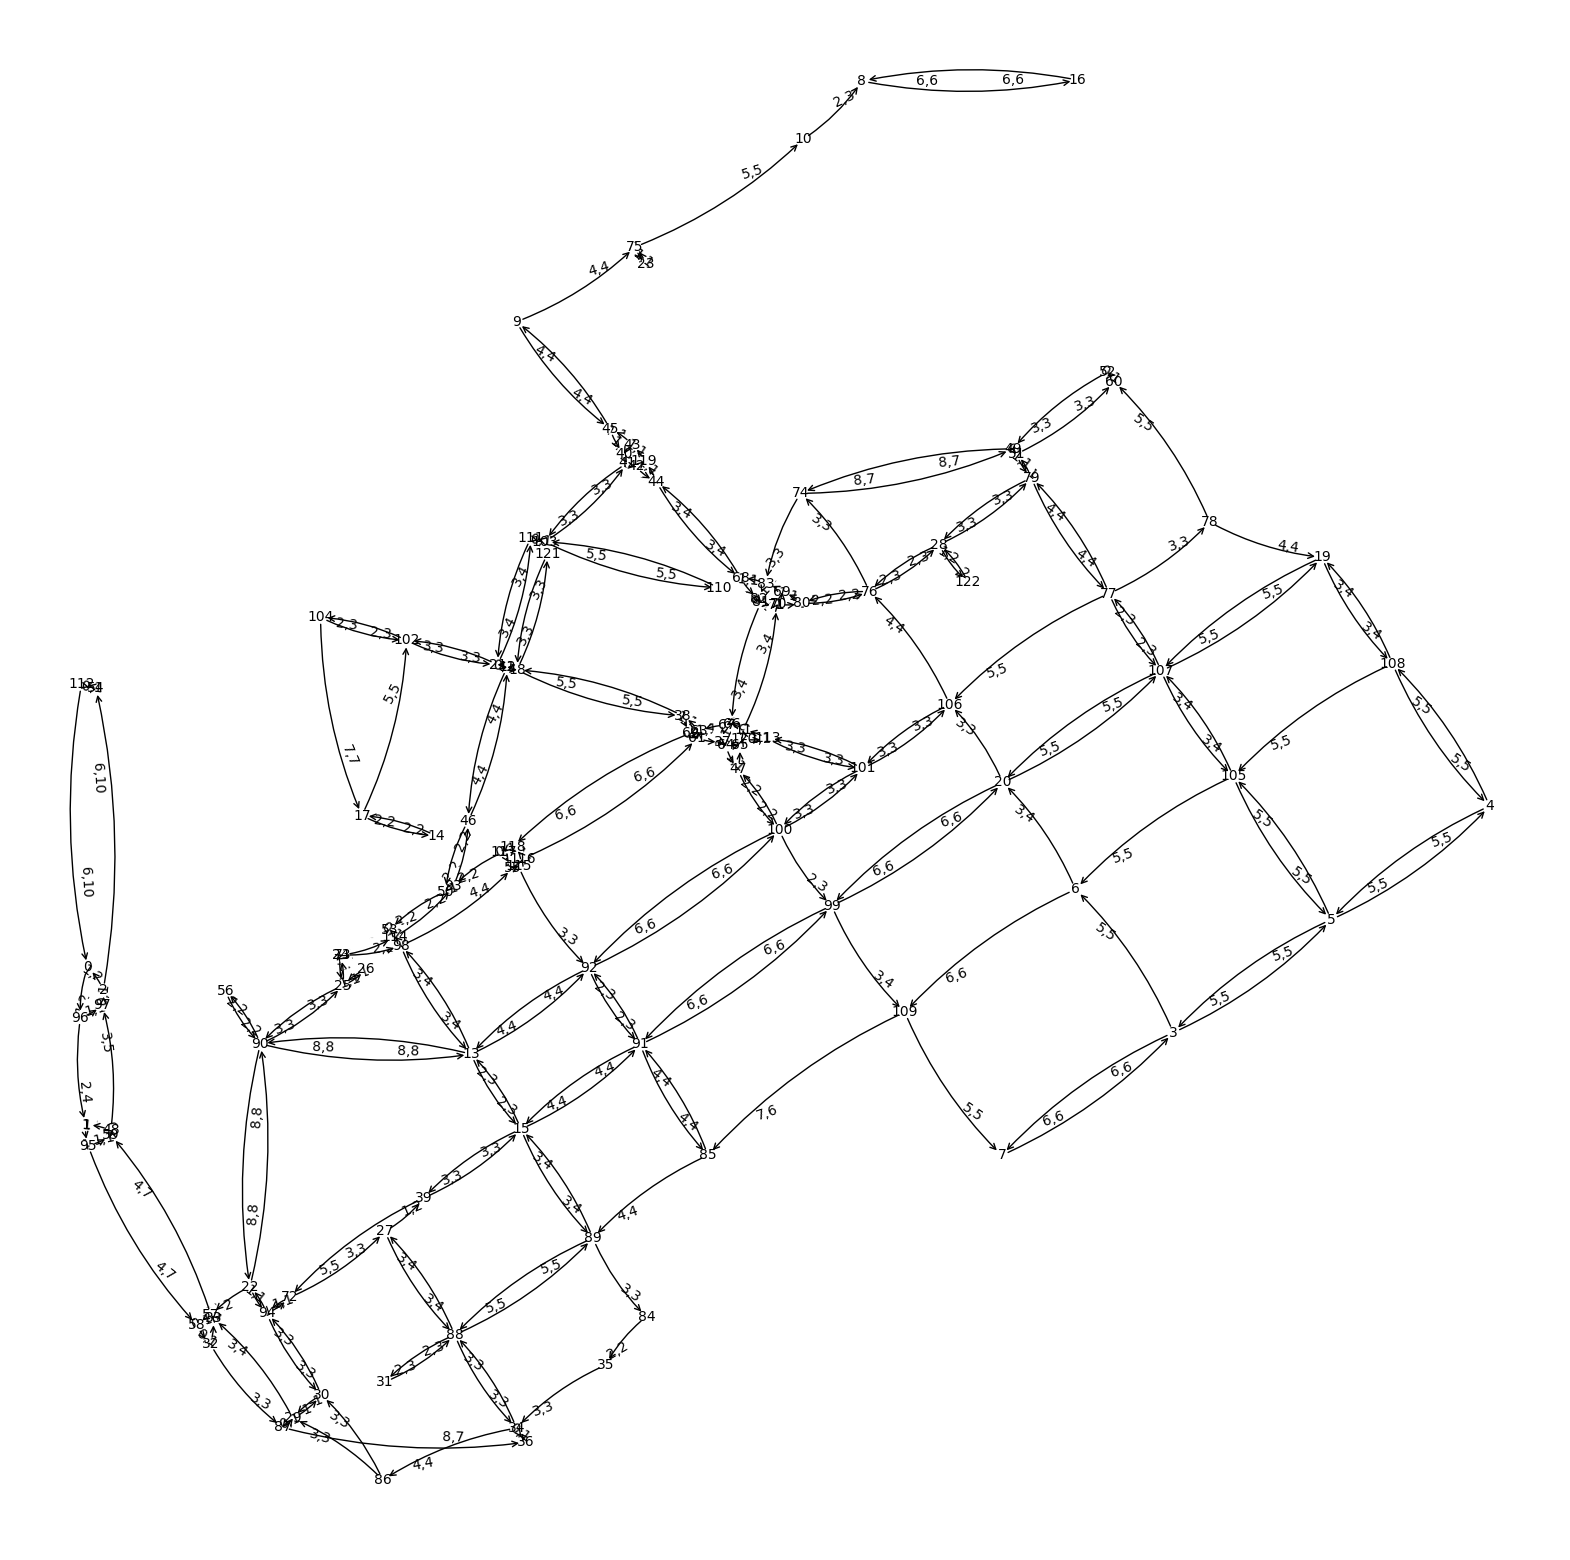

In [5]:
# obj,constraints,vp = hf.init_from_graph(graph,[(0,3,1),(0,4,3),(0,5,2)])
obj,constraints,vp = hf.init_from_graph(graph,[(6,20,1),(6,100,3),(6,105,2)])
hf.plot_multigraph(graph, with_labels=True, font_size=10)

[((0, 5805.0), 0)]
21 0.00390625
****[((False, 87), 1), ((False, 87), 2)]
21 0.00390625
***[((False, 87), 2), ((False, 87), 3), ((False, 87), 4)]
21 0.0078125
****[((False, 87), 3), ((False, 87), 4)]
21 0.00390625
***[((False, 87), 4), ((False, 87), 5), ((False, 87), 6)]
21 0.00390625
********[((False, 87), 5), ((False, 87), 6), ((False, 89), 7), ((False, 89), 8)]
21 0.00390625
*****[((False, 87), 6), ((False, 89), 7), ((False, 89), 8), ((False, 87), 9), ((False, 87), 10)]
21 0.00390625
************[((False, 87), 9), ((False, 87), 10), ((False, 87), 11), ((False, 87), 12), ((False, 89), 7), ((False, 89), 8)]
21 0.00390625
*******[((False, 89), 7), ((False, 89), 8), ((False, 87), 10), ((False, 87), 11), ((False, 87), 12), ((False, 87), 13), ((False, 87), 14)]
21 0.00390625
****************[((False, 87), 10), ((False, 87), 11), ((False, 87), 12), ((False, 87), 13), ((False, 87), 14), ((False, 89), 8), ((False, 89), 15), ((False, 89), 16)]
21 0.0078125
*********[((False, 89), 8), ((False,

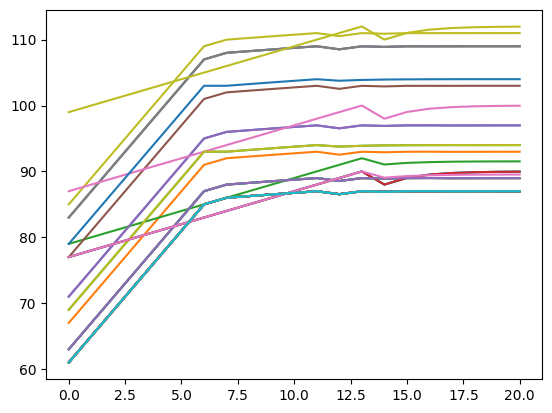

In [31]:
n_best = hf.run(obj,constraints,vp,graph,MAX_ITER=40,MAX_ITER_LR=20)

k	COLOR
0 	 b
1 	 r
2 	 g


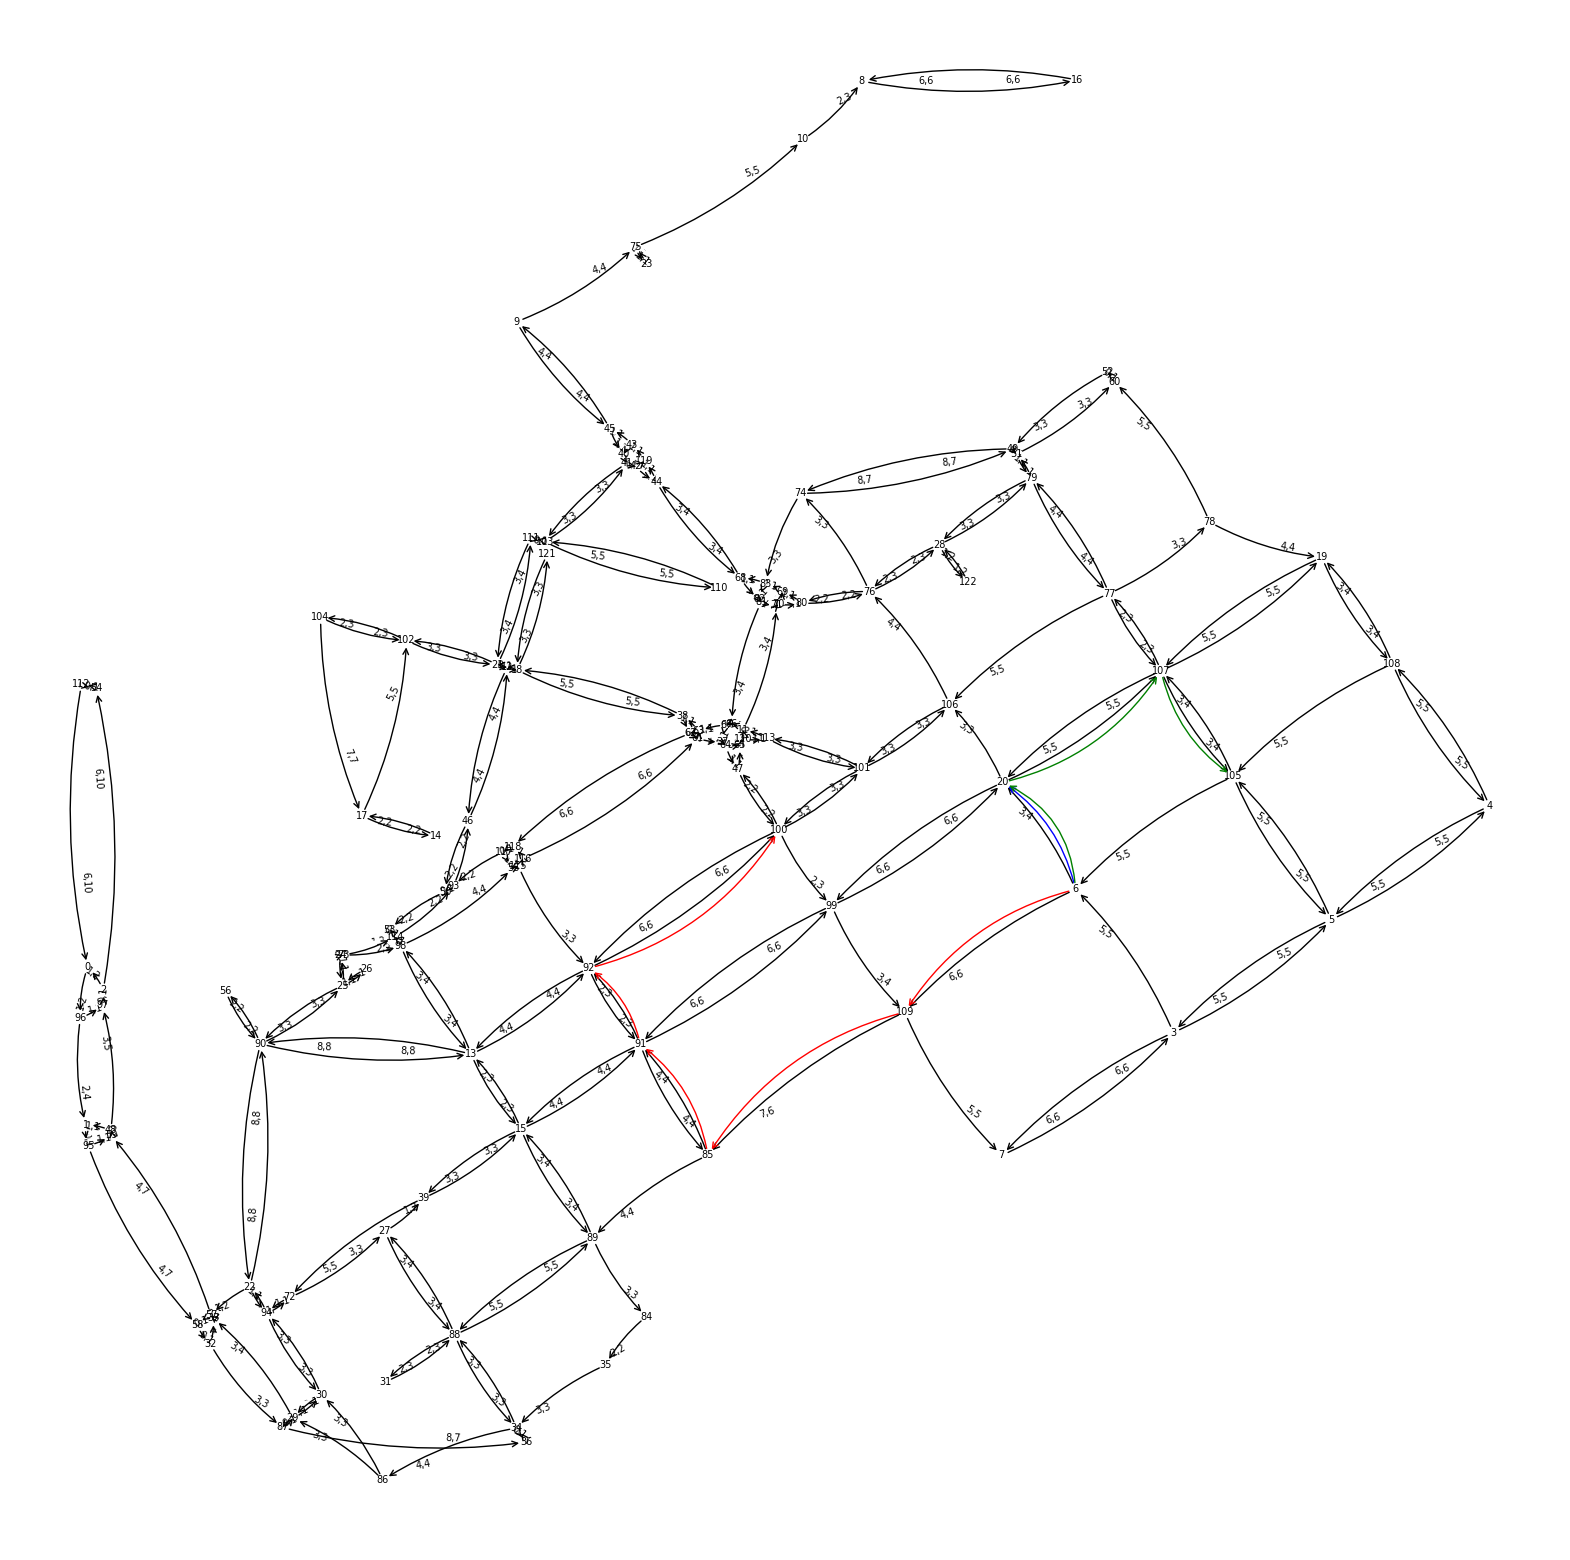

In [32]:
hf.plot_solution_graph(graph,n_best.sol["X"],with_labels=True,font_size=7)
# [(6,20,1),(6,100,3),(6,105,2)]

[((0, 5805.0), 0)]
39 7.275957614183426e-12
****[((False, 61), 1), ((False, 61), 2)]
39 7.275957614183426e-12
***[((False, 61), 2), ((False, 61), 3), ((False, 61), 4)]
39 7.275957614183426e-12
********[((False, 61), 3), ((False, 61), 4), ((False, 63), 5), ((False, 63), 6)]
39 7.275957614183426e-12
*****[((False, 61), 4), ((False, 63), 5), ((False, 63), 6), ((False, 61), 7), ((False, 61), 8)]
39 7.275957614183426e-12
************[((False, 61), 7), ((False, 61), 8), ((False, 63), 5), ((False, 63), 6), ((False, 83), 9), ((False, 83), 10)]
39 7.275957614183426e-12
*******[((False, 63), 5), ((False, 63), 6), ((False, 61), 8), ((False, 83), 9), ((False, 83), 10), ((False, 61), 11), ((False, 61), 12)]
39 7.275957614183426e-12
****************[((False, 61), 8), ((False, 61), 11), ((False, 61), 12), ((False, 63), 6), ((False, 63), 13), ((False, 63), 14), ((False, 83), 9), ((False, 83), 10)]
39 7.275957614183426e-12
*********[((False, 63), 6), ((False, 83), 9), ((False, 83), 10), ((False, 61), 1

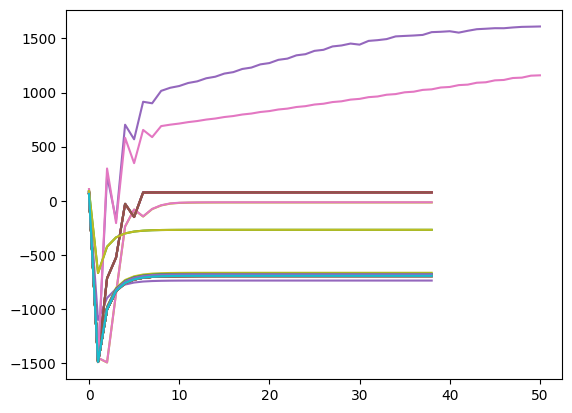

In [8]:
n_best = hf.run(obj,constraints,vp,graph,MAX_ITER=60,MAX_ITER_LR=50)

k	COLOR
0 	 b
1 	 r
2 	 g


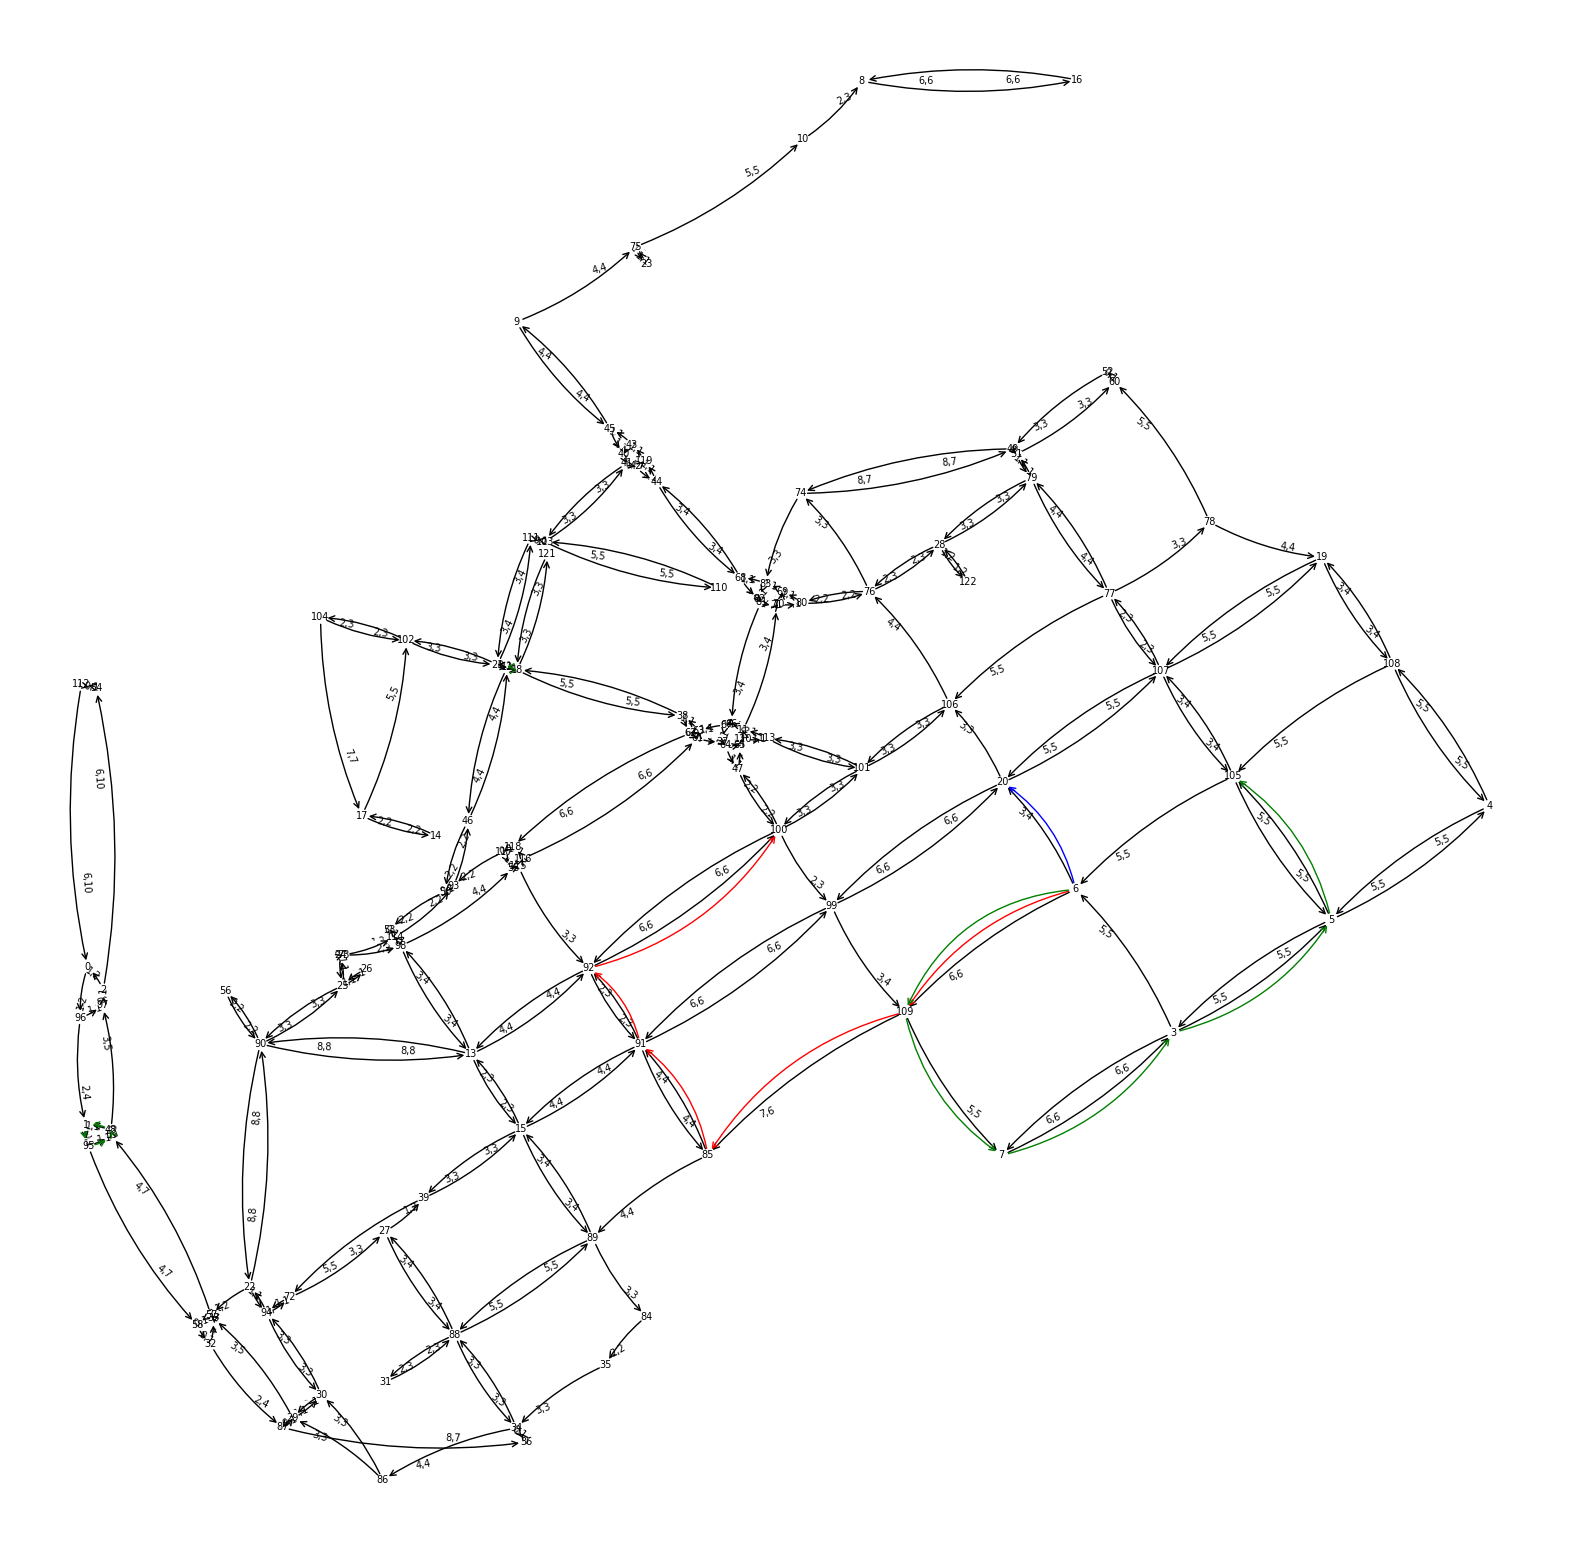

In [17]:
hf.plot_solution_graph(graph,n_best.sol["X"],with_labels=True,font_size=7)
# [(6,20,1),(6,100,3),(6,105,2)]

In [33]:
importlib.reload(hf)

<module 'helper_functions' from '/home/lema/Documents/diplomska/dai/helper_functions.py'>